# Market Research - Restaurants In Los Angeles
## Project Description

- <b> Hey! I'm Ron Sherwi </b>, and my team consider to open a small robot-run cafe in Los Angeles, so they’re interested in the current market conditions.


- <b> My main goal is to understand and describe the characteristics of restaurants in LA,</b> based of:
    - Type of restaurants
    - Restaurant's street
    - Number of seats in a restaurant
    - Chain / not a chain of restaurants
    
    
- <b> I used data of thousands restaurants in LA during 2019. </b> There are many types of restaurants: cafe, fast food, bakery, Pizza, Bar and regular restaurants.
    
    
- <b> The project is divided to 3 parts: </b>
    * <a href="#first_step">Data Preprocessing & EDA</a>
    * <a href="#second_step">Answer key questions</a>
    * <a href="#third_step">Conclusions and recommendations</a>
    
## Link to Presentation <a href="https://drive.google.com/file/d/1RQ4pHRMyhtmq-U7-r8DF3qYS3Iq6zsiB/view?usp=sharing"> Here </a>


# <a id="first_step"> Step 1 - data pre-processing & EDA </a> 

1. Import nacessary libraries & load data.
2. Optimizing the data storage.
3. Converting data types.
4. Searching missing values.
5. Pointing on outliers.
6. Searching duplicates.

### Import necessary libraries

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install regex
import regex as re
!pip install usaddress
import usaddress

### Load the data -

In [316]:
path = '/datasets/'
file = 'rest_data_us.csv'
data = pd.read_csv(path + file)

### First look on data -

In [317]:
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [319]:
data.tail()

,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


In [320]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.4 MB


* <b> Missings </b> - 3 values in 'chain' column.
* <b> Convert types </b> - 'chain' to Boolean type, 'object_type' to Category. 

### Change 'number' name to relevant name - seats 

In [321]:
data = data.rename(columns={'number': 'seats'})

### Checking 'id' column -
* Values are between 11,786 - 21,436.
* No duplicates.

In [322]:
data[['id']].describe()

,id
count,9651.000000
mean,16611.000000
std,2786.148058
min,11786.000000
25%,14198.500000
50%,16611.000000
75%,19023.500000
max,21436.000000


In [323]:
data.id.duplicated().sum()

0

### Checking 'object_name' column -

* <b> Looking for empty strings </b> (when object's name is " ") - I didn't find such cases.
* <b> Adding number of objects per restaurnt - but for it we need to edit 'object name'. </b> We saw in the begginning that there are restaurants with signs like '#number of branch', so for calculating the accurate number of objects per restaurant I need to remove the adds.

In [324]:
# Looking for empty strings
len(data[data.object_name.isin(['', ' '])])

0

In [325]:
# Switching to lowercase.
data['object_name'] = data.object_name.str.lower()
# Checking number of unique objects
data[['object_name']].describe()

,object_name
count,9651
unique,8672
top,the coffee bean & tea leaf
freq,47


In [326]:
# Fixing the names of objects - 
data['name_edited'] = data.apply(lambda x: ' '.join(re.findall('[a-z,\']+', x.object_name)),
                                 axis=1)
data[['name_edited']].describe()

,name_edited
count,9651
unique,7812
top,subway
freq,122


<b> We can see the importance of 'cleaning' the names </b> - number of unique restaurants decreased.

<b> Great example of Mcdonald's is below </b> - the same restaurant, another object name.

In [327]:
data.loc[data.name_edited == "mcdonald's"].sample(5)

,id,object_name,address,chain,object_type,seats,name_edited
2709,14495,mcdonald's # 6999,695 S WESTERN AVE,True,Fast Food,63,mcdonald's
4281,16067,mcdonald's #2287,11300 NATIONAL BLVD,True,Fast Food,108,mcdonald's
8234,20020,mcdonald's #26983,692 S ALVARADO ST,True,Fast Food,33,mcdonald's
4802,16588,mcdonald's #14473,3868 E 3RD ST,True,Fast Food,107,mcdonald's
4987,16773,mcdonald's #24695,1900 W SLAUSON AVE,True,Fast Food,123,mcdonald's


### Checking distribution of objects per restaurant name

In [328]:
# Checking number of objects per restaurant name
objects_data = data.groupby('name_edited').agg({'id':'count'}).reset_index()
objects_data.columns = ['name_edited', 'num_of_objects']
objects_data.sort_values(by='num_of_objects', ascending=False).head()

,name_edited,num_of_objects
6405,subway,122
6357,starbucks coffee,87
4415,mcdonald's,80
3128,jack in the box,54
6857,the coffee bean tea leaf,51


In [329]:
objects_data[['num_of_objects']].describe()

,num_of_objects
count,7812.000000
mean,1.235407
std,2.444731
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,122.000000


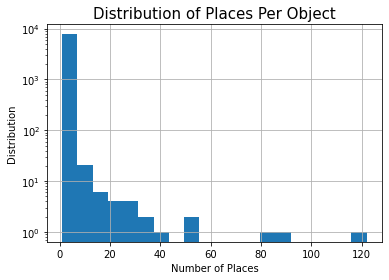

In [330]:
ax = objects_data.num_of_objects.hist(bins=20, log=True)
plt.title('Distribution of Places Per Object', fontsize=15)
plt.xlabel('Number of Places')
plt.ylabel('Distribution')
plt.show()

In [331]:
print('95% of the restaurants have', int(np.percentile(objects_data.num_of_objects, 95)), 'places or less')
print('97.5% of the restaurants have',int(np.percentile(objects_data.num_of_objects, 97.5)),' places or less')
print('99% of the restaurants have',int(np.percentile(objects_data.num_of_objects, 99)),' places or less')

95% of the restaurants have 2 places or less
97.5% of the restaurants have 3  places or less
99% of the restaurants have 5  places or less


In [332]:
# Adding num of objects to the main data
data = data.merge(objects_data, on='name_edited', how='left')
data.head()

,id,object_name,address,chain,object_type,seats,name_edited,num_of_objects
0,11786,habitat coffee shop,3708 N EAGLE ROCK BLVD,False,Cafe,26,habitat coffee shop,1
1,11787,reilly's,100 WORLD WAY # 120,False,Restaurant,9,reilly's,1
2,11788,street churros,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,street churros,1
3,11789,triniti echo park,1814 W SUNSET BLVD,False,Restaurant,22,triniti echo park,1
4,11790,pollen,2100 ECHO PARK AVE,False,Restaurant,20,pollen,1


### Checking 'chain' column -
* <b> 3 missing values </b> - I checked this objects in Google and they're not chains.
* <b> Looking for empty strings </b> - (when address name is " ", for example).I didn't find such cases.
* <b> Unmarked chains </b> - I found restaurants with more than one place, but aren't marked as chains - so i'll mark them as chain also. 
* <b> Chains with 1 place </b> - There are restaurants with 1 branch in LA but it doesn't mean they are not a chain - they may have branches in another states in US (like NY, Chicago..) so i left them as is.

In [333]:
# First look on 'chain'
data[['chain']].value_counts()

chain
False    5972
True     3676
dtype: int64

In [334]:
# I check this objects in Google - they're not chains.
data[data.chain.isnull()]

,id,object_name,address,chain,object_type,seats,name_edited,num_of_objects
7408,19194,taqueria los 3 carnales,5000 E WHITTIER BLVD,NaN,Restaurant,14,taqueria los carnales,1
7523,19309,jammin jimmy's pizza,1641 FIRESTONE BLVD,NaN,Pizza,1,jammin jimmy's pizza,1
8648,20434,the lexington theater,129 E 3RD ST,NaN,Restaurant,35,the lexington theater,1


In [335]:
# Filling empty 'chains' and converting to 'bool' type
data.loc[data.chain.isnull(),'chain'] = False
data.chain = data.chain.astype('bool')

* <b> Unmarked chains </b> - We can see that there are 292 objects that have more than one place but are not marked as chain

In [336]:
len(data.query('num_of_objects > 1 and chain == False')['object_name'].drop_duplicates())

292

In [337]:
# Switching these objects to chains
data.loc[data['num_of_objects'] > 1, 'chain'] = True

### Checking 'address' column -
* <b> Same address to different restaurants </b> - There are addresses that appear more than once, but it's normal - this addresses are centers, with several restaurants.

In [338]:
# First look on 'address'
data[['address']].describe()

,address
count,9651
unique,8517
top,3607 TROUSDALE PKWY
freq,11


In [339]:
# Checking for empty strings
len(data[data.address.isin(['', ' '])])

0

In [340]:
# There is a slight difference with lowercase letters, so i'll switch the values to lowercase.
print(data.address.str.lower().describe())
data.address = data.address.str.lower()

count                    9651
unique                   8513
top       3607 trousdale pkwy
freq                       11
Name: address, dtype: object


In [341]:
# I guess that adress that appears more than once is acutally a big center - 
data.groupby('address').agg({'id': 'count'}).sort_values(by='id', ascending=False
                                                        ).reset_index().rename(columns={'id':'places'}).head()

,address,places
0,3607 trousdale pkwy,11
1,135 n grand ave,10
2,400 world way,9
3,600 world way,9
4,5151 state university dr,9


### Checking 'object_type' column -
* <b> Most of the objects are restaurants (75%) </b> -  The second is fast food (11%) and the rest are cafe, pizza, bar and bakery.
* <b> Convert the types to 'category' </b>
* <b>  Chains with several types of restaurant </b> - It's a mistake, I switched for each case the appropriate type.

In [342]:
# First look on 'object_type'
data[['object_type']].describe()

,object_type
count,9651
unique,6
top,Restaurant
freq,7255


In [343]:
# Showing percantage of each type
round(data.object_type.value_counts() / len(data) * 100)

Restaurant    75.0
Fast Food     11.0
Cafe           5.0
Pizza          3.0
Bar            3.0
Bakery         3.0
Name: object_type, dtype: float64

In [344]:
# Switching the letters to lowercase
data.object_type = data.object_type.str.lower()

In [345]:
# Converting to 'catrgory' type
data.object_type = data.object_type.astype('category')

In [346]:
# Checking for objects with more than one type - if it's chain, i'll switch to the best option
object_types = data.groupby('name_edited').agg({'object_type': 'nunique'}).reset_index()
many_object_types = object_types.query('object_type > 1')
print('Number of restaurants with different types:', len(many_object_types))

Number of restaurants with different types: 7


In [347]:
many_object_types

,name_edited,object_type
4415,mcdonald's,2
5623,ralphs market,2
6213,smart final,2
6320,sprouts farmers market,2
6695,target,2
7493,vons market,2
7584,whole foods market,2


In [348]:
# Checking for the best type for this restaurants.
many_object_types_pivot = data.query(
    'name_edited in @many_object_types.name_edited').pivot_table(
    index='name_edited', columns='object_type', values='id', aggfunc='count').fillna(0)

many_object_types_pivot

object_type,cafe,fast food,restaurant
name_edited,,,
mcdonald's,0.0,59.0,21.0
ralphs market,4.0,0.0,17.0
smart final,1.0,0.0,1.0
sprouts farmers market,1.0,0.0,2.0
target,2.0,0.0,1.0
vons market,1.0,0.0,7.0
whole foods market,1.0,0.0,5.0


In [349]:
# Fast food
data.loc[data.name_edited == "mcdonald's",'object_type'] = "fast food"

# Cafe
data.loc[data.name_edited =="target",'object_type'] = "cafe"

# Restaurants
data.loc[data.name_edited.isin(['ralphs market',
                                'smart final',
                                'sprouts farmers market',
                                'vons market',
                                'whole foods market'
                                ]),'object_type'] = "restaurant"

# Check it's done
many_object_types_pivot = data.query(
    'name_edited in @many_object_types.name_edited').pivot_table(
    index='name_edited', columns='object_type', values='id', aggfunc='count').fillna(0)
many_object_types_pivot

object_type,cafe,fast food,restaurant
name_edited,,,
mcdonald's,0.0,80.0,0.0
ralphs market,0.0,0.0,21.0
smart final,0.0,0.0,2.0
sprouts farmers market,0.0,0.0,3.0
target,3.0,0.0,0.0
vons market,0.0,0.0,8.0
whole foods market,0.0,0.0,6.0


### Checking 'seats' column - 
* <b> Distribution </b> - 75% of objects have 46 seats or less, but the mean is 47 - because there are lots of outliers!

In [350]:
# First look on 'number' column 
data[['seats']].describe()

,seats
count,9651.000000
mean,43.695161
std,47.622874
min,1.000000
25%,14.000000
50%,27.000000
75%,46.000000
max,229.000000


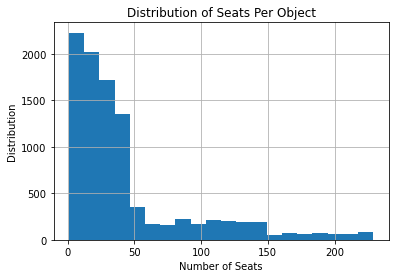

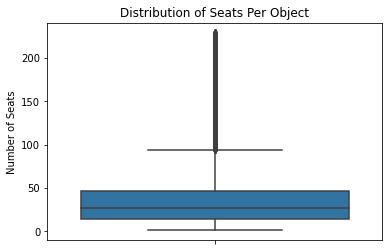

In [351]:
ax = data.seats.hist(bins=20)
plt.title('Distribution of Seats Per Object')
plt.xlabel('Number of Seats')
plt.ylabel('Distribution')
plt.show()

sns.boxplot(y='seats', data=data)
plt.title('Distribution of Seats Per Object')
plt.ylabel('Number of Seats')
plt.show()

### Checking for duplicates

In [352]:
# No duplicates
data.duplicated().sum()

0

# <a id="second_step"> Step 2 - answer key questions</a> 

## Q1 - Investigate the proportions of the various types of establishments

In [353]:
# Getting amount of each object type
object_types = data.groupby('object_type').agg({'id': 'count'}).reset_index().sort_values(by='id')
object_types.columns = ['object_type', 'amount']
object_types['percentage'] = np.round(object_types.amount / object_types.amount.sum() * 100)
object_types

,object_type,amount,percentage
0,bakery,283,3.0
1,bar,292,3.0
4,pizza,320,3.0
2,cafe,428,4.0
3,fast food,1087,11.0
5,restaurant,7241,75.0


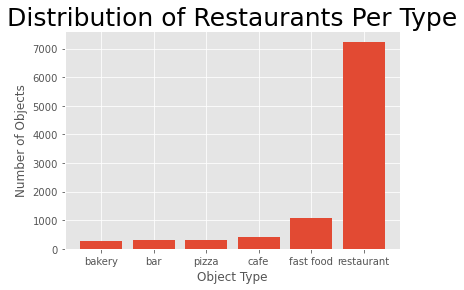

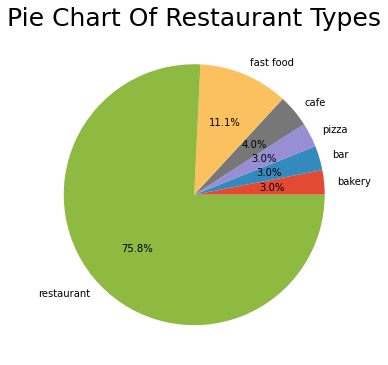

In [354]:
# Showing the amount & percentage of each object by bar
with plt.style.context('ggplot'):
    # Bar plot
    plt.bar(object_types.object_type, object_types.amount)
    plt.title('Distribution of Restaurants Per Type', fontsize=25)
    plt.xlabel('Object Type')
    plt.ylabel('Number of Objects')
    plt.show() 
    # Pie chasrt
    plt.subplots(figsize=(12, 6))
    plt.pie(object_types.percentage, labels=object_types.object_type, autopct='%1.1f%%')
    plt.title('Pie Chart Of Restaurant Types', fontsize=25)
    plt.show()

## Q2 - Investigate the proportions of chain and nonchain establishments

In [355]:
# Calculate number of chains
chains = data.groupby('chain').agg({'id': 'count'}).reset_index().sort_values(by='id').rename(columns=({'id': 'amount'}))
chains.chain = chains.chain.replace(True, 'Chains' )
chains.chain = chains.chain.replace(False, 'Not Chains' )
chains['percentage'] = np.round(chains.amount / chains.amount.sum() * 100)
chains

,chain,amount,percentage
1,Chains,3997,41.0
0,Not Chains,5654,59.0


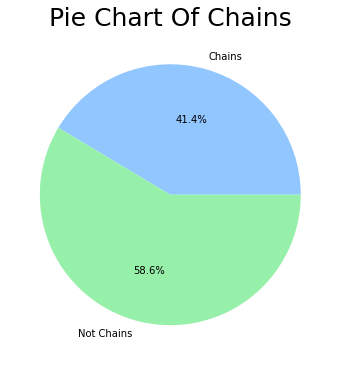

In [356]:
with plt.style.context('seaborn-pastel'):
    plt.subplots(figsize=(12, 6))
    plt.pie(chains.amount, labels=chains.chain, autopct='%1.1f%%')
    plt.title('Pie Chart Of Chains', fontsize=25)
    plt.show()

## Q3 - Which type of establishment is typically a chain?

In [357]:
# Calculate number of objects per type and chain
chain_per_type = data.groupby(['object_type', 'chain']).agg({'id' : 'count'}).reset_index()
chain_per_type.columns = ['object_type', 'chain', 'amount']
chain_per_type['perc_per_type'] = np.round(chain_per_type.apply(
    lambda x: (x.amount / chain_per_type[chain_per_type.object_type
                                         == x.object_type].amount.sum()), axis=1) * 100)
chain_per_type

,object_type,chain,amount,perc_per_type
0,bakery,False,0,0.0
1,bakery,True,283,100.0
2,bar,False,207,71.0
3,bar,True,85,29.0
4,cafe,False,150,35.0
5,cafe,True,278,65.0
6,fast food,False,403,37.0
7,fast food,True,684,63.0
8,pizza,False,146,46.0
9,pizza,True,174,54.0


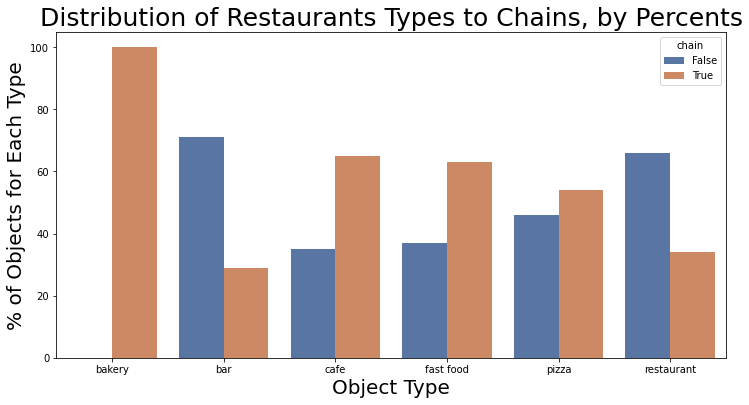

In [358]:
plt.subplots(figsize=(12, 6))
ax = sns.barplot(x='object_type', y='perc_per_type', data=chain_per_type,
                 hue='chain', palette='deep')
plt.title('Distribution of Restaurants Types to Chains, by Percents', fontsize=25)
plt.xlabel('Object Type', fontsize=20)
plt.ylabel('% of Objects for Each Type', fontsize=20)
plt.show()

### We can see that  bakeries have only chains!
- In addition, most of coffee shops (more than 60%) are chains.
- From the other hand, most of bars and restaurants aren't chains.


## Q4 - What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

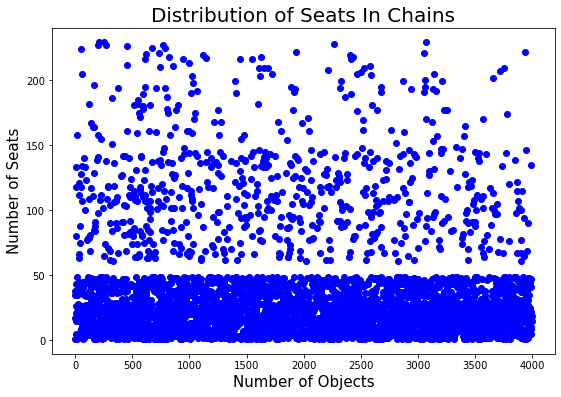

In [359]:
chain_data = data.query('chain == True')
plt.subplots(figsize=(9, 6))
plt.scatter(x=pd.Series(range(0, len(chain_data))), y='seats', data=chain_data, color='blue')
plt.title('Distribution of Seats In Chains', fontsize=20)
plt.xlabel('Number of Objects', fontsize=15)
plt.ylabel('Number of Seats', fontsize=15)
plt.show()

In [360]:
print('Number of establishments with 50 seats maximum in their place:',
      len(chain_data.query('seats <= 50')))
print('Number of establishments with 50 seats at least in their place:',
      len(chain_data.query('seats > 50')))

Number of establishments with 50 seats maximum in their place: 3294
Number of establishments with 50 seats at least in their place: 703


### We can clearly see that this idea happens at the same time -  while there are many establishments with a small number of seats, there are few establishments with lots of seats!

## Q5 - Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats?

In [361]:
# Calculating average number of seats per type
avg_seats = data.groupby('object_type').agg({'seats'
                                             : 'mean'}).reset_index().sort_values(by='seats')
avg_seats.columns = ['object_type', 'avg_seats_num']
avg_seats.avg_seats_num = np.round(avg_seats.avg_seats_num)
avg_seats

,object_type,avg_seats_num
0,bakery,22.0
2,cafe,25.0
4,pizza,28.0
3,fast food,33.0
1,bar,45.0
5,restaurant,48.0


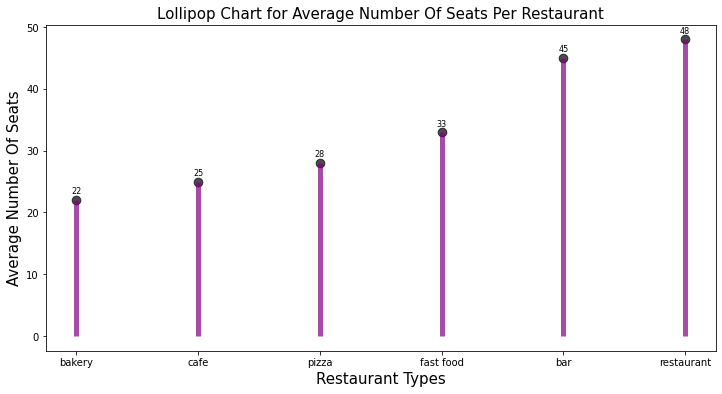

In [362]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.vlines(x=avg_seats.object_type, ymin=0, ymax=avg_seats.avg_seats_num,
          color='purple', alpha=0.7, linewidth=5)
ax.scatter(x=avg_seats.object_type, y=avg_seats.avg_seats_num, s=75, 
           color='black', alpha=0.7)
ax.set_title('Lollipop Chart for Average Number Of Seats Per Restaurant', fontsize=15)
ax.set_ylabel('Average Number Of Seats', fontsize=15)
ax.set_xlabel('Restaurant Types', fontsize=15)
for row in avg_seats.itertuples():
    ax.text(row.object_type, row.avg_seats_num + 1, s=int(round(row.avg_seats_num, 2)),
            fontdict={'horizontalalignment': 'center', 'size': 8})

### Restaurants (48) and bars (44) have the greatest number of seats!

## Q6 - Put the data on street names from the address column in a separate column 

In [363]:
# I used 'usaddress' module for getting the name of the address. The 'parse' function splits all
# words and numbers in the string and characterize each of them - Address number, Street name, etc.
# I took only the 'StreetName' kinds..
def get_street_name(address):
    address_param = usaddress.parse(address)
    street = ''
    for i in address_param:
        if i[1] == 'StreetName':
            street += i[0] + ' ' 
    return street[:len(street) - 1]

data['street'] = data.address.apply(get_street_name)
data.head()

,id,object_name,address,chain,object_type,seats,name_edited,num_of_objects,street
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26,habitat coffee shop,1,eagle rock
1,11787,reilly's,100 world way # 120,False,restaurant,9,reilly's,1,world
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20,street churros,1,hollywood
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22,triniti echo park,1,sunset
4,11790,pollen,2100 echo park ave,False,restaurant,20,pollen,1,echo park


### We can see the function works except of 2 streets - Olvera and Los Angeles 1/2 

In [364]:
# Checking for streets that the function didn't catch
data.query('street == ""')

,id,object_name,address,chain,object_type,seats,name_edited,num_of_objects,street
1888,13674,magdaleno debbie,olvera st e17,False,restaurant,15,magdaleno debbie,1,
3719,15505,las anitas,olvera st 26,False,restaurant,38,las anitas,1,
7003,18789,d.k. donuts,1033 1/2 los angeles st,False,fast food,8,d k donuts,1,
7281,19067,cielito lindo,olvera st 23,False,restaurant,2,cielito lindo,1,
7319,19105,juanita's cafe,olvera st 20,False,restaurant,12,juanita's cafe,1,
7321,19107,kitty's snow cones,olvera st 2,False,restaurant,11,kitty's snow cones,1,
7438,19224,la golondrina,olvera st w17,False,restaurant,204,la golondrina,1,
7741,19527,rodolfo's restaurant,olvera st 5,True,restaurant,4,rodolfo's restaurant,1,


### I'll add this edge cases to another function:

In [365]:
# Checking for exceptions, then filling manually
def get_street_name(address):
    address_param = usaddress.parse(address)
    street = ''
    for i in address_param:
        if i[0].startswith('olvera'):
            return 'olvera'
        elif i[0].startswith('1033 1/2 los angeles st'):
            return '1033 1/2 los angeles st'
        elif i[1] == 'StreetName':
            street += i[0] + ' '
    return street[:len(street) - 1]

data['street'] = data.address.apply(get_street_name)

data.query('street == ""')

,id,object_name,address,chain,object_type,seats,name_edited,num_of_objects,street
7003,18789,d.k. donuts,1033 1/2 los angeles st,False,fast food,8,d k donuts,1,


In [366]:
# Checking particular case
address_param = usaddress.parse('1033 1/2 los angeles st')
address_param

[('1033', 'AddressNumber'),
 ('1/2', 'AddressNumberSuffix'),
 ('los', 'PlaceName'),
 ('angeles', 'PlaceName'),
 ('st', 'StateName')]

In [367]:
# I'll change it manually
data.loc[data.address == '1033 1/2 los angeles st', 'street'] = '1033 1/2 los angeles'

## Q7 - Plot a graph of the top ten streets by number of restaurants.

In [368]:
# Calculate number of restaurants per street
streets = data.groupby('street').agg({'id': 'count'}).reset_index().sort_values(by='id',
                                                                               ascending=False)
streets.columns = ['street', 'rest_in_street']
top_ten = streets.head(10)
top_ten

,street,rest_in_street
421,sunset,405
471,wilshire,398
361,pico,371
461,western,369
179,figueroa,334
343,olympic,309
445,vermont,288
391,santa monica,264
25,3rd,263
225,hollywood,254


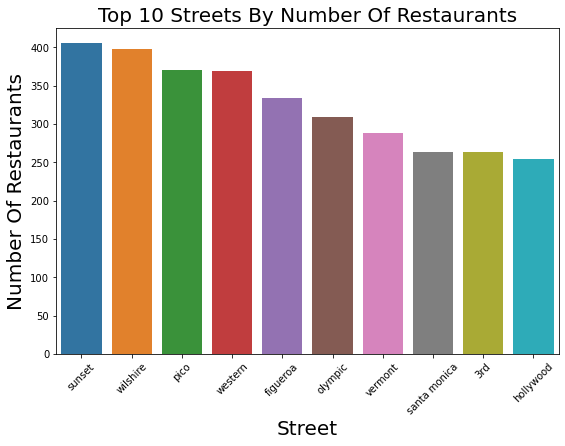

In [369]:
plt.subplots(figsize=(9, 6))
ax = sns.barplot(x='street', y='rest_in_street', data=top_ten)
plt.title('Top 10 Streets By Number Of Restaurants', fontsize=20)
plt.xlabel('Street', fontsize=20)
plt.ylabel('Number Of Restaurants', fontsize=20)
plt.xticks(rotation=45)
plt.show()

## Q8 - Find the number of streets that have one restaurant

In [370]:
# Adding indication to street with one restaurant
streets['one_rest'] = streets.rest_in_street == 1
boring_street = streets.groupby('one_rest').agg({'street': 'count'}).reset_index()
boring_street

,one_rest,street
0,False,288
1,True,196


### There are 196 streets that have only one restaurant

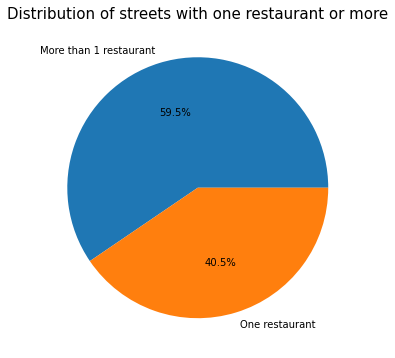

In [371]:
plt.subplots(figsize=(8, 6))
plt.pie(boring_street.street, labels=['More than 1 restaurant', 'One restaurant'],
            autopct='%1.1f%%')
plt.title('Distribution of streets with one restaurant or more', fontsize=15)
plt.show()

## Q9 - For streets with a lot of restaurants, look at the distribution of the number of seats

### 1.  Let's calculate the average number of seats in reastaurnt for each street
### 2. Then, I'll decide which number of restaurants is 'a lot'.
### 3. I'll try to find a connection between number of restaurants to number of seats.

In [372]:
# 1. Calculating average number of seats per street
seats_per_street = data.groupby(
    'street' ).agg({'seats':'mean'}).reset_index().sort_values(by='seats', ascending=False)
seats_per_street.columns = ['street', 'seats_per_street']
seats_per_street['seats_per_street'] = np.round(seats_per_street['seats_per_street'])

# Adding the average number of seats to 'street' DF
streets = streets.merge(seats_per_street, on='street', how='left')
streets.head()

,street,rest_in_street,one_rest,seats_per_street
0,sunset,405,False,48.0
1,wilshire,398,False,53.0
2,pico,371,False,41.0
3,western,369,False,41.0
4,figueroa,334,False,45.0


In [373]:
# 2. I'll decide which range to investigate - number of restaurants in street.
streets[['rest_in_street']].describe()

,rest_in_street
count,484.000000
mean,19.940083
std,53.744686
min,1.000000
25%,1.000000
50%,2.000000
75%,10.000000
max,405.000000


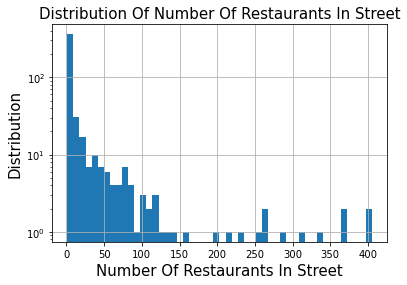

In [374]:
ax = streets.rest_in_street.hist(bins=50, log=True)
plt.title('Distribution Of Number Of Restaurants In Street', fontsize=15)
ax.set_xlabel('Number Of Restaurants In Street', fontsize=15)
ax.set_ylabel('Distribution', fontsize=15)
plt.show()

- We can see that most of the streets (75%) have 10 restaurants or less.
### So, streets with more than 10 restaurants are concidered as 'full of restaurants'

In [375]:
# General info about average number of seats
streets[['seats_per_street']].describe()

,seats_per_street
count,484.000000
mean,50.942149
std,43.670951
min,2.000000
25%,22.000000
50%,38.000000
75%,65.000000
max,229.000000


In [376]:
# Build df for streets with lots of restaurants
full_streets = streets.query(
    'rest_in_street > 10')[['rest_in_street', 'seats_per_street']].sort_values(
    by='rest_in_street')
full_streets.head()

,rest_in_street,seats_per_street
117,11,63.0
116,11,73.0
115,11,13.0
109,12,79.0
110,12,18.0


In [377]:
# We have 118 'full streets'
len(full_streets)

118

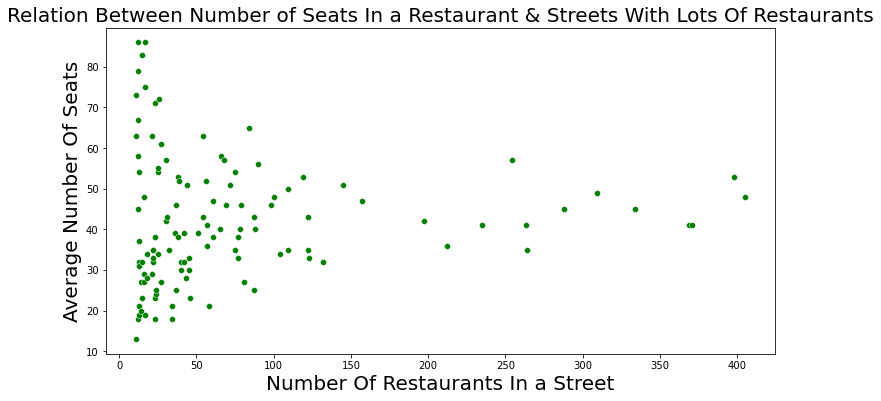

In [378]:
plt.subplots(figsize=(12, 6))
sns.scatterplot(data=full_streets, x="rest_in_street", y="seats_per_street", color='green')
plt.title('Relation Between Number of Seats In a Restaurant & Streets With Lots Of Restaurants', fontsize=20)
plt.xlabel('Number Of Restaurants In a Street', fontsize=20)
plt.ylabel('Average Number Of Seats', fontsize=20)
plt.show()

### We can see that the more restaurants in streets, the number of seats becomes stable around the average (about 50), like normal distribution!

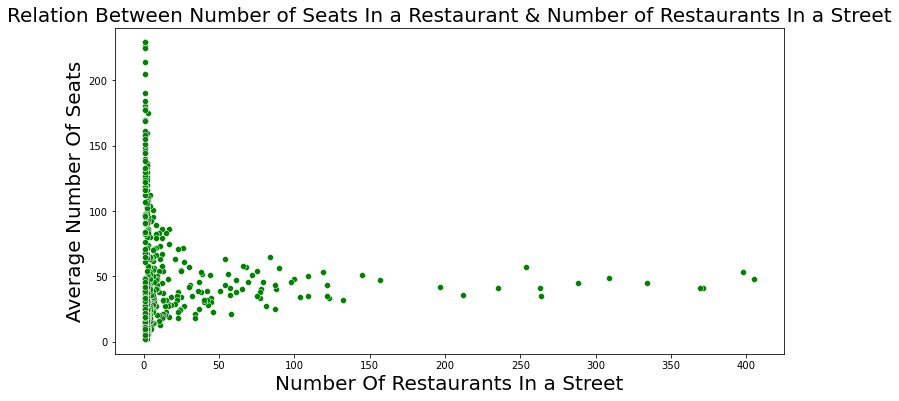

In [379]:
plt.subplots(figsize=(12, 6))
sns.scatterplot(data=streets, x="rest_in_street", y="seats_per_street", color='green')
plt.title('Relation Between Number of Seats In a Restaurant & Number of Restaurants In a Street', fontsize=20)
plt.xlabel('Number Of Restaurants In a Street', fontsize=20)
plt.ylabel('Average Number Of Seats', fontsize=20)
plt.show()

### We can see this trend also in streets with small number of restaurants (but with a little skewness)

# <a id="third_step"> Step 3 - Conclusions:</a> 
## General Stats:

1. <b> There are 9651 restaurants in LA. </b>


2. <b> The Most common type of establishment is restaurant -  </b>
    * 75% of the establishments (that is 7251) are restaurants.
    * 11% of them (that is 1087 objects) are fast food.
    * The rest (between 3%-4% for each type, that is 280-430 objects per type) are cafe, pizza, bar   and bakery. 
    
    
3. <b> 41% of the places (that is 3997) are chains - </b>
    * All bakeries belong to chains. 
    * In addition, most of the fast food and cafe (~60%) belong to chains.
    * From the other hand, most of the restaurants and bars (~60%) aren't belong to chains.
    
    
4. <b> The average number of seats in a place is 44 - </b>
    * There are many chains (3294, that is 82%) with a small number of seats (less than 50 seats); and few chains (18%, that is 703) with a lot of seats.
    * The highest average number of seats is in restaurants - 48 seats, and bars with 44 seats.
    * The average number in fast food is 32, and 28 in pizza.
    * The lowest average is in cafe - 25, and bakeries - 22.
    
    
5.  <b> The restaurants are spread over 484 streets in LA. </b>
    * 59% of this streets (that is 288 streets) have only one restaurant, while the others (196) have more than once.

## Recommendations

#### 1. I advise to use the robot in restaurants, because the average number of seats there is much higher than others.
    
#### 2. I also reccomend to use the robot in a popular street in LA, that way more people will know it

#### 3. We can start with several chains. We can use it in a few stores, and then looking for increase in revenues.

### Ron Sherwi


## Link to Presentation <a href="https://drive.google.com/file/d/1RQ4pHRMyhtmq-U7-r8DF3qYS3Iq6zsiB/view?usp=sharing"> Here </a>
